# Introduzione al calcolo delle probabilità {#sec-intro-prob}

**Prerequisiti**

Prima di procedere, è essenziale leggere l'appendice @sec-combinatorics per ulteriori informazioni.

**Concetti e competenze chiave**

- Comprendere le diverse interpretazioni della probabilità.
- Conoscere e saper applicare i concetti di spazio campionario ed evento.
- Interpretare gli assiomi della probabilità.
- Avere una chiara comprensione della legge dei grandi numeri.
- Calcolare la probabilità tramite simulazione.
- Applicare la legge dei grandi numeri tramite simulazione.
- Calcolare le permutazioni e le combinazioni.

**Preparazione del Notebook**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import itertools as it
import math
import random
import scipy.stats as stats
import arviz as az
import seaborn as sns
from collections import Counter

In [ ]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "intro_prob"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

In questo capitolo, esamineremo alcuni concetti generali e fondamentali che sono cruciali per una  comprensione dei metodi bayesiani. Ulteriori concetti legati alla probabilità verranno introdotti o approfonditi nei capitoli successivi, a seconda delle necessità. Tuttavia, per uno studio dettagliato della teoria delle probabilità, consiglio vivamente il libro "Introduction to Probability" di Blitzstein e Hwang (2019).

Nel corso di questo capitolo, esploreremo varie concezioni della probabilità, tra cui la visione classica, frequentista e bayesiana. Approfondiremo anche argomenti come le variabili casuali, le funzioni di massa di probabilità e le funzioni di ripartizione. Inoltre, introdurremo la simulazione con Python per una migliore comprensione della legge dei grandi numeri, un concetto fondamentale nell'ambito della probabilità.

## Storia e definizioni della probabilità

La probabilità è un modo formale di quantificare l'incertezza, assegnando plausibilità o credibilità a un insieme di possibilità mutuamente esclusive o risultati di un esperimento o osservazione.

### Che cos'è la probabilità?
Ci sono due modi principali per interpretare la probabilità:

- **Frequentista**: Secondo il framework frequentista, la probabilità rappresenta il limite della frequenza relativa con cui un evento di interesse si verifica quando il numero di esperimenti condotti ripetutamente nelle stesse condizioni tende all'infinito. In questa visione, chiamata "ontologica", la probabilità è considerata una proprietà intrinseca del mondo, indipendente dalla nostra esperienza. La probabilità è quindi vista come una caratteristica oggettiva della realtà.
- **Bayesiana**: Al contrario, il framework bayesiano interpreta la probabilità come una credenza soggettiva riguardo alla probabilità di accadimento di un evento. In questa prospettiva "epistemica", la probabilità è una misura della nostra conoscenza del mondo piuttosto che una proprietà oggettiva. Questa visione soggettiva della probabilità dipende dalle informazioni disponibili e dal punto di vista dell'osservatore.

### Storia della probabilità
La storia della probabilità è lunga e complessa, come illustrato in varie opere (Tabak 2004, Stigler 1986, Weisberg 2014). L'origine della probabilità moderna risale a una domanda posta da Antoine Gombaud (Chevalier de Méré) a Blaise Pascal (1623–1662) su come dividere equamente le puntate di un gioco di carte interrotto. 

#### Problema dei punti

Il problema può essere formulato così:

> Immaginiamo due persone che partecipano a un gioco a più round. In ogni round, entrambe le persone hanno la stessa probabilità di vincere. La prima persona che vince sei round consecutivi si aggiudicherà un ricco premio in denaro. Supponiamo che A e B abbiano già disputato sei round, con A che ha vinto cinque volte e B una volta. In quel momento, il gioco è interrotto. Poiché né A né B hanno raggiunto le sei vittorie, hanno deciso di dividere il premio. Ma qual è il modo più equo per farlo?

La discussione tra Pierre de Fermat (1607–1665) e Pascal ha portato alla formalizzazione dell'utilizzo della matematica per risolvere questo problema, proponendo di considerare le probabilità di vincita di ciascun giocatore. Ad esempio, se A ha una probabilità del 97% di vincere il premio e B ha una probabilità del 3%, sembrerebbe equo assegnare ad A il 97% del premio. L'interesse pubblico per la loro corrispondenza è sopravvissuto grazie al libro di Christian Huygens del 1657 "De Ratiociniis in Ludo Aleae" (Sul Ragionamento nei Giochi di Dadi), che è rimasto il riferimento per la probabilità per circa 50 anni.

#### Sviluppi successivi
Il libro postumo di Jacob Bernoulli, "L'Arte della Congettura" (1713), ha segnato una svolta nella storia della probabilità. Bernoulli ha definito la probabilità come un indice di incertezza compreso tra 0 e 1 e ha collegato il calcolo della probabilità ai dati e alla frequenza a lungo termine di un evento, noto come legge dei grandi numeri. Bernoulli ha applicato la probabilità anche a settori diversi dal gioco d'azzardo, come la mortalità umana e la giustizia penale, creando la cosiddetta "probabilità soggettiva".

### Interpretazione "classica"
Storicamente, la prima definizione di probabilità è stata proposta da Pierre-Simon Laplace (1749-1827), che si è avvalso del calcolo combinatorio. Secondo Laplace, la probabilità$P$di un evento è definita come il rapporto tra il numero di casi in cui l'evento si verifica e il numero totale di casi possibili. In questa definizione, un evento è qualcosa a cui è possibile assegnare un valore di verità, ovvero qualcosa che può essere vero o falso. Ad esempio, la probabilità di ottenere un 3 in un lancio di un singolo dado è 1/6 ≃ 0.17, poiché c'è un solo caso favorevole (il lancio ha prodotto un 3) su sei casi possibili (i numeri da 1 a 6). Tuttavia, questa definizione è insoddisfacente in quanto si basa sull'assunzione che ogni evento sia equiprobabile, il che non è sempre vero. Inoltre, questa definizione è circolare poiché per definire il concetto di probabilità, è necessario prima definire cosa significa che gli eventi siano equiprobabili, e quindi si deve già conoscere il concetto di probabilità.

### Interpretazione frequentista
Un secondo tentativo di definire la probabilità (dopo quello "classico" di Laplace) si basa sull'approccio frequentista, che può essere attribuito a molti autori. In questo approccio, la probabilità è definita sulla base delle frequenze osservate dell'occorrenza di un evento. Questo approccio nasce dalla difficoltà di assegnare una probabilità agli eventi assumendo il principio di equiprobabilità, come nel caso delle monete, dei dadi o delle carte di un mazzo. Sebbene la probabilità di ottenere testa come risultato del lancio di un dado sia 1/2 se crediamo che la moneta sia bilanciata, se così non fosse non potremmo assegnare la stessa probabilità a tutti i risultati possibili. Tuttavia, possiamo stimare le probabilità come la frequenza$f_t$, definita come il rapporto tra il numero di volte in cui un lancio ha prodotto "testa" e il numero totale di lanci.

Si osservi che l'osservazione della frequenza $f_t$ è solo un' approssimazione della probabilità, ma l'accuratezza migliora all'aumentare del numero totale di lanci, $N$. In linea di principio, la probabilità di ottenere "testa", $P(T)$, è il limite della frequenza $f_t$ quando il numero totale di lanci $N$ tende all'infinito. Tuttavia, questa definizione richiede l'infinita ripetizione di un esperimento, il che può essere impraticabile o impossibile in molti casi. Inoltre, questa definizione assume che gli eventi futuri siano simili agli eventi passati, il che non è sempre garantito.

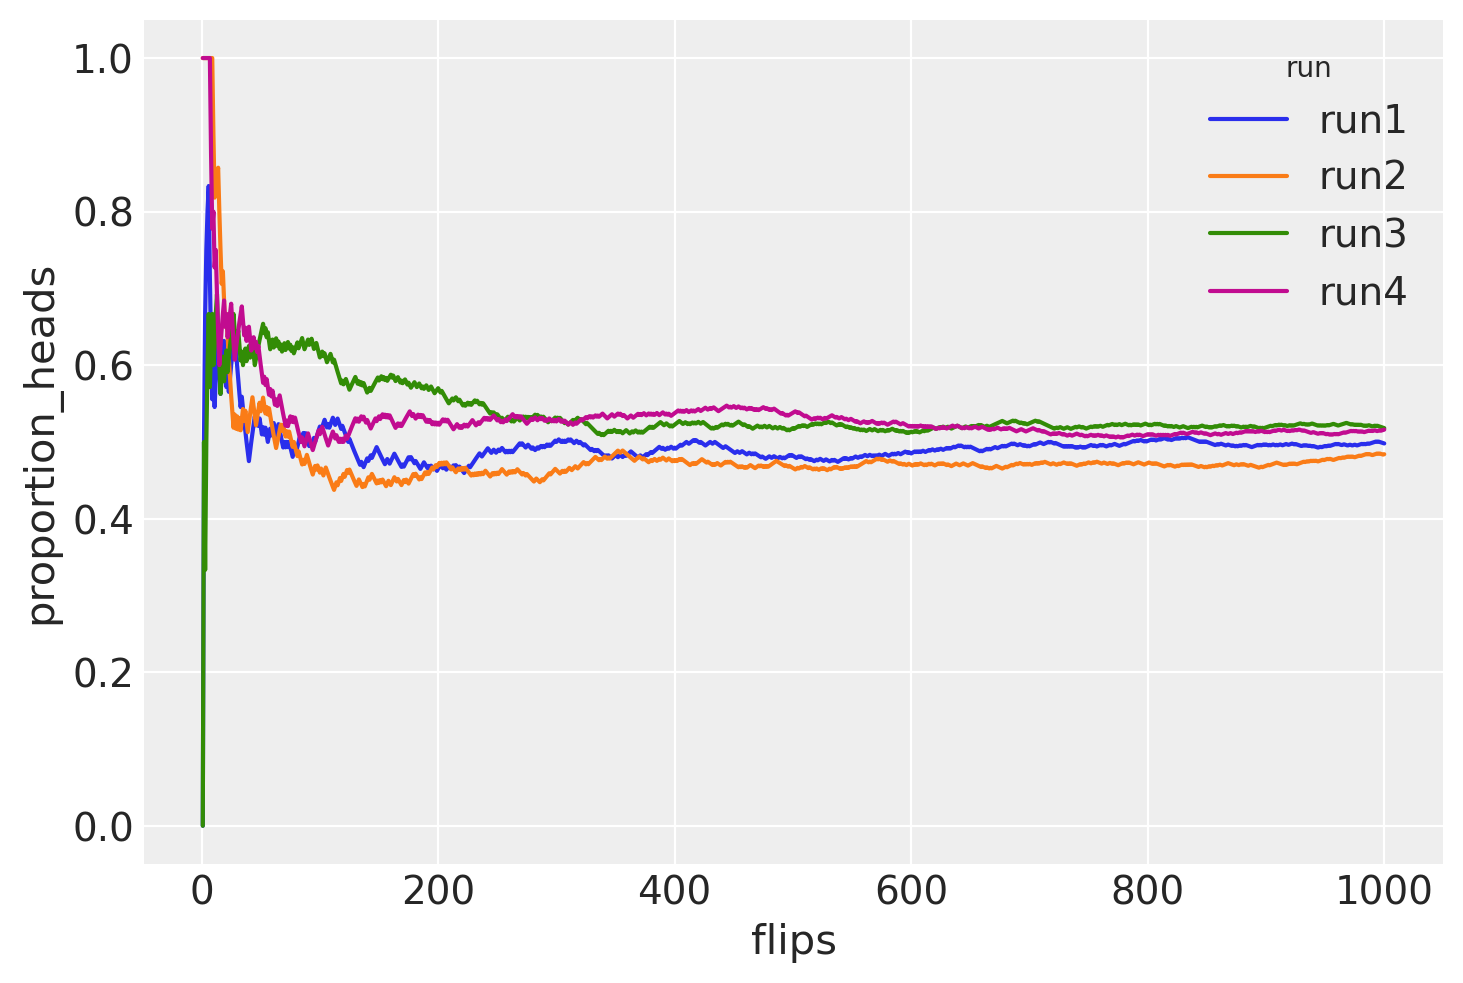

In [3]:
def coin_flips(n, run_label):
    # Genera un array di 0 e 1 dove 1 rappresenta 'testa' e 0 'croce'
    # usando una distribuzione binomiale.
    heads = np.random.binomial(1, 0.5, n)
    
    # Calcola la proporzione cumulativa di teste.
    flips = np.arange(1, n + 1) 
    proportion_heads = np.cumsum(heads) / flips
    
    # Crea un DataFrame per un facile accesso e visualizzazione dei dati.
    df = pd.DataFrame({'flips': flips, 'proportion_heads': proportion_heads, 'run': run_label})

    return df

n = 1000

df = pd.concat([coin_flips(n, f'run{i+1}') for i in range(4)], axis=0)
ax = sns.lineplot(data = df, x = 'flips', y = 'proportion_heads', hue = 'run')

### La Legge dei Grandi Numeri

La simulazione precedente fornisce un esempio della Legge dei grandi numeri. La Legge dei Grandi Numeri afferma che, man mano che il numero di esperimenti casuali ripetuti aumenta, la stima della probabilità di un evento $P(Y=y)$ diventa sempre più accurata.

Il teorema sostiene che, con l'aumento del numero di ripetizioni di un esperimento casuale, la media dei risultati osservati tende a convergere al valore atteso teorico della variabile casuale. In altre parole, la media empirica dei risultati osservati si avvicina sempre di più al valore medio teorico.

Questa legge è cruciale perché garantisce che, con un numero sufficientemente grande di prove, la stima empirica della probabilità di un evento si avvicina al valore reale. Questo rende le stime probabilistiche più precise e affidabili.

Dal punto di vista pratico, la Legge dei Grandi Numeri consente di utilizzare modelli probabilistici per interpretare fenomeni reali. Anche se le osservazioni singole possono variare in modo casuale, la media delle osservazioni su un ampio numero di ripetizioni rifletterà fedelmente le probabilità teoriche.

Formalmente, data una serie di variabili casuali indipendenti $X_1, X_2, \ldots, X_n$, ciascuna con media $\mu$, la Legge dei Grandi Numeri è espressa come:

$$
\lim_{{n \to \infty}} P\left(\left|\frac{X_1 + X_2 + \ldots + X_n}{n} - \mu\right| < \epsilon\right) = 1,
$$

dove $\epsilon$ è un valore positivo arbitrariamente piccolo e $P(\cdot)$ indica la probabilità. Questo significa che, con un numero molto grande di ripetizioni, la media campionaria osservata sarà vicina alla media teorica attesa, permettendo inferenze affidabili sulla probabilità degli eventi.

In sintesi, la Legge dei Grandi Numeri assicura che, aumentando il numero di prove, le stime empiriche delle probabilità diventano sempre più precise, allineandosi con i valori teorici attesi.

#### Problema del caso singolo

Nell'ambito dell'approccio frequentista alla probabilità, basato sulla concezione delle frequenze relative di eventi osservati su lunghe serie di ripetizioni, emerge un limite concettuale nel trattare la probabilità di eventi singolari e non ripetibili. Secondo questa prospettiva, infatti, non risulta rigorosamente appropriato discutere di probabilità relative a eventi unici e non replicabili nel tempo. Esempi emblematici di tali eventi includono la possibilità che Alcaraz vinca contro Djokovic nella finale di Wimbledon del 2023 o che si verifichi pioggia a Firenze il giorno di Ferragosto del 2024. Questi scenari, essendo unici e circoscritti a un preciso momento storico, sfuggono alla logica frequentista che richiede, per definizione, la possibilità di osservazione ripetuta degli eventi per valutarne la probabilità. Nonostante ciò, nel linguaggio comune non specialistico, è comune l'uso del termine "probabilità" per riferirsi anche a tali eventi specifici e non ripetibili, evidenziando così una discrepanza tra l'uso tecnico e quello colloquiale del concetto di probabilità.

### Collegamento tra probabilità e statistica

Durante gli anni '20 del Novecento, Ronald A. Fisher propose un nuovo framework teorico per l'inferenza statistica, basato sulla concettualizzazione della frequenza. Fisher introdusse concetti chiave come la massima verosimiglianza, i test di significatività, i metodi di campionamento, l'analisi della varianza e il disegno sperimentale.

Negli anni '30, Jerzy Neyman ed Egon Pearson fecero ulteriori progressi nel campo con lo sviluppo di una teoria della decisione statistica, basata sul principio della verosimiglianza e sull'interpretazione frequentista della probabilità. Definirono due tipologie di errori decisionali e utilizzarono il test di significatività di Fisher, interpretando i valori$p$come indicatori dei tassi di errore a lungo termine.

### La riscoperta dei metodi Monte Carlo Markov chain

Fisher assunse una prospettiva critica nei confronti della "probabilità inversa" (ossia, i metodi bayesiani), nonostante questa fosse stata la metodologia predominante per l'inferenza statistica per quasi un secolo e mezzo. Il suo approccio frequentista ebbe un profondo impatto sullo sviluppo della statistica sia teorica che sperimentale, contribuendo a un decremento nell'utilizzo dell'inferenza basata sul metodo della probabilità inversa, originariamente proposto da Laplace.

Nel 1939, il libro di Harold Jeffreys intitolato "Theory of Probability" rappresentò una delle prime esposizioni moderne dei metodi bayesiani. Tuttavia, la rinascita del framework bayesiano fu rinviata fino alla scoperta dei metodi Monte Carlo Markov chain alla fine degli anni '80. Questi metodi hanno reso fattibile il calcolo di risultati precedentemente non ottenibili, consentendo un rinnovato interesse e sviluppo nei metodi bayesiani. Per una storia dell'approccio bayesiano, si veda [Bayesian Methods: General Background](https://bayes.wustl.edu/etj/articles/general.background.pdf) oppure [Philosophy of Statistics](https://plato.stanford.edu/entries/statistics/).

### Interpretazione soggettivista

Una visione alternativa della probabilità la considera come una credenza soggettiva. @de2017theory ha proposto un'interpretazione in cui la probabilità non è vista come una caratteristica oggettiva degli eventi, ma piuttosto come una misura della credenza soggettiva, suggerendo di trattare $p(·)$ come una probabilità soggettiva. È interessante notare che de Finetti era un soggettivista radicale. Infatti, la frase di apertura del suo trattato in due volumi sulla probabilità afferma che "La probabilità non esiste", intendendo che la probabilità non ha uno status oggettivo, ma rappresenta piuttosto la quantificazione della nostra esperienza di incertezza. Riteneva che l'idea di una probabilità esterna all'individuo, con uno status oggettivo, fosse pura superstizione, paragonabile al credere in "Etere cosmico, Spazio e Tempo assoluti, ..., o Fate e Streghe...". Secondo de Finetti, "... esistono solo probabilità soggettive - cioè, il grado di credenza nell'occorrenza di un evento attribuito da una determinata persona in un dato momento con un dato insieme di informazioni."

Come sottolineato da @press2009subjective, la prima menzione della probabilità come grado di credenza soggettiva fu fatta da @ramsey1926truth, ed è questa nozione di probabilità come credenza soggettiva che ha portato a una notevole resistenza alle idee bayesiane. Una trattazione dettagliata degli assiomi della probabilità soggettiva si trova in @fishburn1986axioms.

La denominazione "soggettivo" legata alla probabilità potrebbe risultare infelice, poiché potrebbe suggerire un ragionamento vago o non scientifico. @lindley2013understanding condivide queste riserve, proponendo l'alternativa "probabilità personale" rispetto a "probabilità soggettiva". Analogamente, @howson2006scientific preferiscono utilizzare l'espressione "probabilità epistemica", che riflette il grado di incertezza di un individuo di fronte al problema trattato. In sostanza, la probabilità epistemica si riferisce all'incertezza personale riguardo a variabili sconosciute. Questa terminologia viene adottata anche nel testo di @kaplan2023bayesian, fornendo un linguaggio più neutro per discutere di questi concetti.

Va inoltre notato che l'interpretazione soggettiva si adatta bene a eventi singoli, permettendo di esprimere una convinzione su eventi specifici, come la probabilità di pioggia in un dato giorno o l'esito di una competizione sportiva.

### Nota

Per chi desidera approfondire, il primo capitolo del testo *Bernoulli's Fallacy* [@clayton2021bernoulli] offre un'introduzione molto leggibile alle tematiche della definizione della probabilità nella storia della scienza.

## Definizioni e assiomi

Indipendentemente dalla controversia in corso sulla sua interpretazione, la probabilità è stata stabilita come teoria matematica dal matematico sovietico Andrey Kolmogorov all'inizio del XX secolo. Poiché sia i frequentisti che i bayesiani utilizzano questa teoria matematica, il disaccordo riguarda l'interpretazione e non la matematica.

È possibile definire la probabilità utilizzando i seguenti tre concetti: esperimento, spazio campionario ed evento.

### Esperimenti casuali ed eventi

Sia i fenomeni deterministici che quelli stocastici influenzano la nostra vita quotidiana, determinando le dinamiche degli eventi che ci circondano.

- Un **fenomeno deterministico** produce sempre lo stesso risultato ogni volta che viene ripetuto nelle stesse condizioni. Ad esempio, se riscaldiamo l'acqua a 100°C a livello del mare, essa bollirà sempre.
- Un **fenomeno casuale** è caratterizzato da condizioni in cui il risultato non può essere determinato con certezza prima che si verifichi. In altre parole, ogni volta che il processo o l'esperimento viene ripetuto, si osserva uno tra i vari possibili risultati. Ad esempio, quando si lancia una moneta, l'esito può essere testa (T) o croce (C), ma non si può conoscere in anticipo quale sarà.

Nella teoria delle probabilità, un *esperimento casuale* è un processo o una situazione in cui il risultato non può essere previsto con certezza prima dell'esecuzione dell'esperimento. Per poter analizzare correttamente gli esperimenti casuali, sono fondamentali alcune nozioni chiave, come indicato nelle sezioni successive.

### Spazi Campionari ed Eventi

Lo **spazio campionario** $\Omega$ è l'insieme degli esiti possibili di un esperimento. 
I punti$\omega$in$\Omega$sono chiamati **esiti campionari** o **realizzazioni**. 

Ad esempio, se lanciamo un dado a 6 facce, lo spazio campionario è costituito dai sei possibili risultati, Ω = {1, 2, 3, 4, 5, 6}. Diversi esperimenti casuali hanno spazi campionari differenti che possono essere rappresentati in modo equivalente. Ad esempio:

- Lancio di una moneta: Ω = {T, C}
- Lancio di due monete: Ω = {TT, TC, CT, CC}

Gli **eventi** sono sottoinsiemi di$\Omega$. 

Un evento è denotato da una lettera maiuscola come A, B, o C. Ad esempio, nel caso del lancio di un dado, l'evento "numero pari" può essere rappresentato da A = {2, 4, 6}, che è un sottoinsieme di Ω (A ⊂ Ω), e l'evento "numero dispari" da B = {1, 3, 5}, anch'esso un sottoinsieme di Ω (B ⊂ Ω).

Se un evento è costituito da un singolo risultato dello spazio campionario, è detto evento elementare. Ad esempio, l'evento di ottenere il numero 1 nel lancio di un dado, denotato come A = {1}. Se un evento è costituito da più risultati dello spazio campionario, è detto evento composto, come l'evento di ottenere un numero pari nel lancio di un dado, A = {2, 4, 6}.

Dato un evento$A$, sia $A^c = \{ \omega \in \Omega : \text{non } (\omega \in A) \}$ il complemento di $A$. Il complemento di$\Omega$è l'insieme vuoto $\varnothing$. 

L'unione degli eventi$A$e$B$è definita come $A \cup B = \{ \omega \in \Omega : \omega \in A \text{ o } \omega \in B \}$. Se$A_1, A_2, \dots$è una sequenza di insiemi, allora

$$\cup_{i=1}^\infty A_i = \left\{ \omega \in \Omega : \omega \in A_i \text{ per qualche } i \right\}$$

L'intersezione di $A$ e $B$ è $A \cap B = \{ \omega \in \Omega : \omega \in A \text{ e } \omega \in B \}$. Se $A_1, A_2, \dots$ è una sequenza di insiemi, allora

$$\cap_{i=1}^\infty A_i = \left\{ \omega \in \Omega : \omega \in A_i \text{ per tutti } i \right\}$$

Sia $A - B = \left\{ \omega \in \Omega : \omega \in A \text{ e non } (\omega \in B) \right\}$. Se ogni elemento di $A$ è contenuto in $B$, scriviamo $A \subset B$o$B \supset A$. Se $A$ è un insieme finito, sia $|A|$ il numero di elementi in $A$.

| Notazione           | Significato                                            |
|---------------------|--------------------------------------------------------|
|$\Omega$           | spazio campionario                                     |
|$\omega$           | esito                                                  | 
|$A$                | evento (sottoinsieme di$\Omega$)                      |
|$\vert A \vert$    | numero di elementi in$A$(se finito)                  |
|$A^c$              | complemento di$A$(non$A$)                           |
|$A \cup B$         | unione ($A$o$B$)                                     |
|$A \cap B$o$AB$  | intersezione ($A$e$B$)                               |
|$A - B$            | differenza insiemistica (punti in$A$ma non in$B$)   |
|$A \subset B$      | inclusione insiemistica ($A$è un sottoinsieme di$B$) |
|$\varnothing$      | evento nullo (sempre falso)                            |
|$\Omega$           | evento certo (sempre vero)                             |

Diciamo che$A_1, A_2, \dots$sono **disgiunti** o **mutuamente esclusivi** se$A_i \cap A_j = \varnothing$ogni volta che$i \neq j$. 

Una **partizione** di$\Omega$è una sequenza di insiemi disgiunti$A_1, A_2, \dots$tale che$\cup_{i=1}^\infty A_i = \Omega$. 

Dato un evento$A$, definiamo la **funzione indicatrice di$A$** come

$$I_A(\omega) = I(\omega \in A) = \begin{cases}
1 &\text{se } \omega \in A \\
0 &\text{altrimenti}
\end{cases}
$$

Una sequenza di insiemi $A_1, A_2, \dots$ è **monotona crescente** se $A_1 \subset A_2 \subset \dots$, e definiamo $\lim_{n \rightarrow \infty} A_n = \cup_{i=1}^\infty A_i$. Una sequenza di insiemi $A_1, A_2, \dots$ è **monotona decrescente** se $A_1 \supset A_2 \supset \dots$ e allora definiamo $\lim_{n \rightarrow \infty} A_n = \cap_{i=1}^n A_i$. In entrambi i casi, scriveremo $A_n \rightarrow A$.

### Probabilità

La probabilità di un evento è una misura numerica che indica la possibilità che tale evento si verifichi. Nel caso del lancio di una moneta, la probabilità di ottenere testa è 1/2, così come la probabilità di ottenere croce. I valori di probabilità P(A) = 0 rappresentano eventi impossibili, mentre P(A) = 1 rappresentano eventi certi.

Per denotare la probabilità che un evento A non si verifichi, possiamo usare la notazione P(¬A) o P(A̅), dove P(A̅) = 1 - P(A).

### Gli Assiomi di Kolmogorov

Una funzione $\mathbb{P}$ che assegna un numero reale $\mathbb{P}(A)$ a ogni evento $A$ è una **distribuzione di probabilità** o una **misura di probabilità** se soddisfa i seguenti tre assiomi:

- **Assioma 1**. La probabilità di un evento $A$ è un numero non negativo: $\mathbb{P}(A) \geq 0$ per ogni $A$.
- **Assioma 2**. La probabilità di tutti i possibili esiti, o spazio campionario $\Omega$, è pari a uno: $\mathbb{P}(\Omega) = 1$.
- **Assioma 3**. Se $A_1, A_2, \dots$ sono disgiunti (mutuamente esclusivi) allora

$$\mathbb{P} \left( \cup_{i=1}^\infty A_i \right) = \sum_{i=1}^\infty \mathbb{P}(A_i).$$

I primi due assiomi insieme implicano che la probabilità varia da 0 a 1. Per comprendere l'ultimo assioma, consideriamo il concetto di eventi mutuamente esclusivi, ossia due eventi, $A$ e $B$, che non condividono alcun risultato. In questo caso, possiamo applicare la regola dell'addizione per concludere che $P(A \cup B) = P(A) + P(B)$.

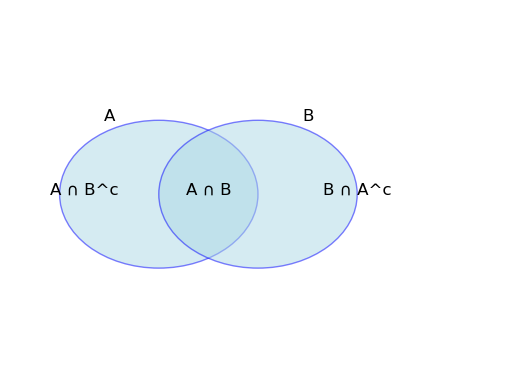

In [2]:
# Creare una nuova figura
fig, ax = plt.subplots()

# Creare cerchi per A e B
circle_A = patches.Circle((0.3, 0.5), 0.2, edgecolor='blue', facecolor='lightblue', alpha=0.5)
circle_B = patches.Circle((0.5, 0.5), 0.2, edgecolor='blue', facecolor='lightblue', alpha=0.5)

# Aggiungere cerchi alla trama
ax.add_patch(circle_A)
ax.add_patch(circle_B)

# Aggiungere etichette per A, B e le regioni
ax.text(0.2, 0.7, 'A', fontsize=12, ha='center')
ax.text(0.6, 0.7, 'B', fontsize=12, ha='center')
ax.text(0.4, 0.5, 'A ∩ B', fontsize=12, ha='center', color='black')
ax.text(0.15, 0.5, 'A ∩ B^c', fontsize=12, ha='center', color='black')
ax.text(0.7, 0.5, 'B ∩ A^c', fontsize=12, ha='center', color='black')

# Impostare i limiti dell'asse
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Rimuovere assi
ax.axis('off')

# Mostrare la trama
plt.show()

Ora, consideriamo due eventi che non sono mutuamente esclusivi perché condividono un risultato. In questo caso, la regola dell'addizione non si applica perché sia $A$ che $B$ contengono alcuni stessi risultati. Per eventi che non sono mutuamente esclusivi, possiamo applicare la seguente regola generale dell'addizione:

Per qualsiasi evento dato$A$e$B$, la regola dell'addizione è data da:

$$P(A \cup B) = P(A) + P(B) - P(A \cap B).$$

Usando il terzo assioma della probabilità, abbiamo:

$$P(A \cup B) = P(A \cap B^c) + P(B \cap A^c) + P(A \cap B).$$

Quando $A$ e $B$ sono mutuamente esclusivi, $P(A \cap B^c)$ e $P(B \cap A^c)$ si riducono a $P(A)$ e $P(B)$ rispettivamente. Inoltre, abbiamo $P(A \cap B) = 0$ in questo caso di mutua esclusività.

Infine, notiamo che l'evento $A$ può essere scomposto in due eventi mutuamente esclusivi, ${A \cap B}$ (regione sovrapposta) e ${A \cap B^c}$ (regione non sovrapposta). Questo è chiamato legge della probabilità totale. Per qualsiasi evento dato $A$ e $B$, la legge della probabilità totale è data da:

$$P(A) = P(A \cap B) + P(A \cap B^c).$$

Secondo la legge della probabilità totale, possiamo scrivere $P(A \cap B^c) = P(A) - P(A \cap B)$ sottraendo $P(A \cap B)$ da entrambi i lati dell'equazione. Analogamente, la legge della probabilità totale può essere applicata all'evento $B$, ottenendo $P(B \cap A^c) = P(B) - P(A \cap B)$. Sostituendo questi risultati nell'equazione precedente e semplificando l'espressione, si arriva alla regola generale dell'addizione. Sottolineiamo che questo risultato è ottenuto utilizzando solo gli assiomi della probabilità.

Alcune proprietà che possono essere derivate dagli assiomi:

- $\mathbb{P}(\varnothing) = 0$,
- $A \subset B \Rightarrow \mathbb{P}(A) \leq \mathbb{P}(B)$,
- $0 \leq \mathbb{P}(A) \leq 1$,
- $\mathbb{P}\left(A^c\right) = 1 - \mathbb{P}(A)$,
- $A \cap B = \varnothing \Rightarrow \mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B)$.

## Elementi di calcolo combinatorio

### Permutazioni

Quando ogni risultato è ugualmente probabile, per calcolare la probabilità di un evento $A$, è necessario contare il numero di elementi nell'evento $A$ e il numero totale di elementi nello spazio campionario:

$$\mathbb{P}(A) = \frac{|A|}{|\Omega|}.$$

Ora introduciamo una tecnica di conteggio utile, chiamata permutazioni. Le permutazioni si riferiscono al numero di modi in cui gli oggetti possono essere disposti. Ad esempio, consideriamo tre oggetti distinti A, B e C. Ci sono 6 modi diversi per disporli: {ABC, ACB, BAC, BCA, CAB, CBA}.

Come possiamo calcolare il numero di permutazioni senza enumerare ogni disposizione, specialmente quando il numero di oggetti è grande? C'è un modo semplice per farlo. Consideriamo l'esempio di disporre tre oggetti, A, B e C. Prima di tutto, ci sono tre modi per scegliere il primo oggetto: A, B o C. Una volta scelto il primo oggetto, ci sono due modi per scegliere il secondo oggetto. Infine, rimane un solo modo per scegliere l'ultimo oggetto. Possiamo concettualizzare questo processo come un albero, dove il numero totale di foglie è uguale al numero di permutazioni. Per calcolare il numero di foglie, basta moltiplicare sequenzialmente il numero di rami a ogni livello, cioè $3 \times 2 \times 1$. 

Generalizzando questa idea, possiamo calcolare il numero di permutazioni di$k$oggetti su un insieme di $n$ oggetti unici, denotato da $nPk$ dove$k \leq n$, usando la seguente formula:

Il numero di permutazioni di$k$oggetti su$n$oggetti unici è dato da:

$$nPk = \frac{n!}{(n - k)!}.$$

Un fattoriale è definito come:

$$n! = n \times (n - 1) \times \cdots \times 2 \times 1.$$

Si noti che $0!$ è definito come 1.

#### Problema dei Compleanni

Il problema dei compleanni è un noto esempio controintuitivo di permutazioni. Il problema chiede quanti individui sono necessari affinché la probabilità che almeno due persone abbiano lo stesso compleanno superi 0.5, assumendo che ogni compleanno sia ugualmente probabile. Sorprendentemente, la risposta è solo 23 persone, molto meno di quanto la maggior parte delle persone immagina.

Per risolvere questo problema usando le permutazioni, notiamo la seguente relazione:

$$P(\text{almeno due persone hanno lo stesso compleanno}) = 1 - P(\text{nessuno ha lo stesso compleanno}).$$

Questa uguaglianza vale perché l'evento "nessuno ha lo stesso compleanno" è il complemento dell'evento "almeno due persone hanno lo stesso compleanno". Questo significa che dobbiamo solo calcolare la probabilità che nessuno abbia lo stesso compleanno.

Sia $k$ il numero di persone. Per calcolare la probabilità che nessuno abbia lo stesso compleanno, contiamo il numero di modi in cui $k$ persone possono avere compleanni diversi. Poiché ogni compleanno è ugualmente probabile, possiamo usare le permutazioni per contare il numero di modi in cui $k$ compleanni unici possono essere disposti su 365 giorni:

$$365Pk = \frac{365!}{(365 - k)!}.$$

Dividiamo questo numero per il numero totale di elementi nello spazio campionario, che è il numero totale di modi in cui $k$ compleanni non unici possono essere disposti su 365 giorni:

$$365^k .$$

Quindi, abbiamo:

$$P(\text{nessuno ha lo stesso compleanno}) = \frac{365Pk}{365^k} = \frac{365!}{365^k (365 - k)!} .$$

Insieme alla precedente equazione, la soluzione al problema dei compleanni è:

$$1 - \frac{365!}{365^k (365 - k)!} .$$

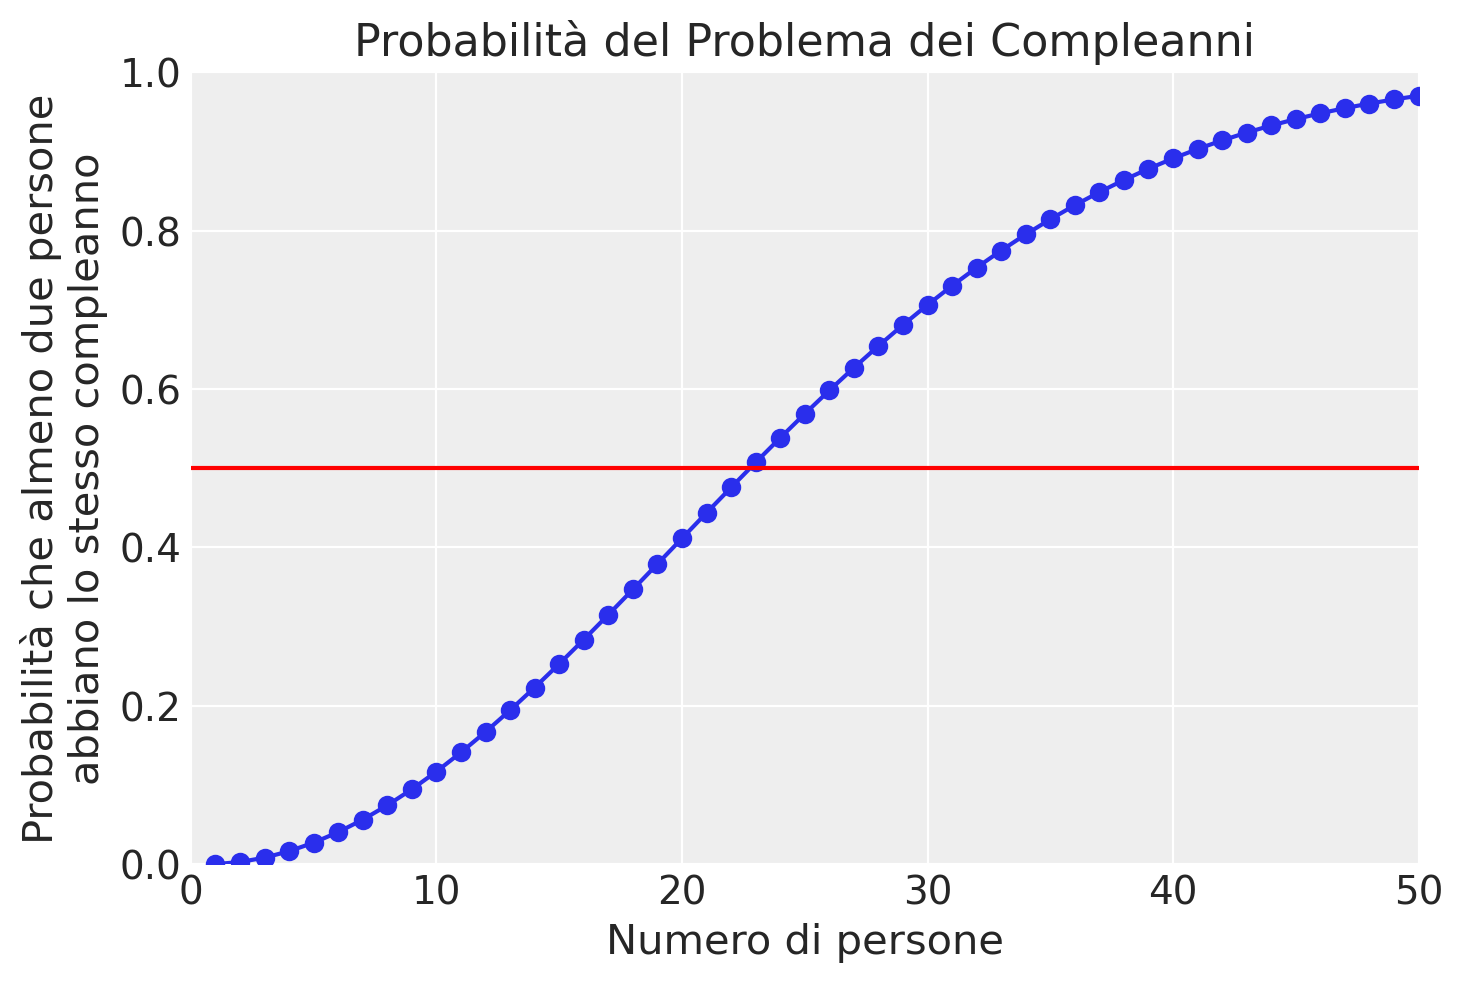

Probabilità per 20-25 persone: [0.41143838358049944, 0.44368833516523465, 0.47569530766240553, 0.507297234324024, 0.5383442579144757, 0.5686997039694264]


In [5]:
def birthday(k):
    logdenom = k * math.log(365) + math.lgamma(365 - k + 1) # log denominatore
    lognumer = math.lgamma(366) # log numeratore
    pr = 1 - np.exp(lognumer - logdenom) # trasformazione inversa
    return pr

k = np.arange(1, 51)
bday = [birthday(i) for i in k]

plt.plot(k, bday, marker='o')
plt.xlabel('Numero di persone')
plt.ylabel('Probabilità che almeno due persone\nabbiano lo stesso compleanno')
plt.axhline(y=0.5, color='r', linestyle='-')
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.grid(True)
plt.title('Probabilità del Problema dei Compleanni')
plt.show()

print("Probabilità per 20-25 persone:", bday[19:25])

Osserviamo che quando il numero di persone è 23, la probabilità che almeno due persone abbiano lo stesso compleanno supera 0.5. Quando il numero di persone è più di 50, questa probabilità è quasi 1.

### Campionamento con e senza reinserimento

Abbiamo derivato una soluzione analitica esatta per il problema dei compleanni, ma possiamo anche produrre una soluzione approssimata utilizzando il metodo della simulazione Monte Carlo. Il nome deriva dal Casinò di Monte Carlo a Monaco, ma possiamo semplicemente chiamarlo metodo di simulazione. La simulazione Monte Carlo è una classe generale di metodi stocastici (contrariamente ai metodi deterministici) che possono essere utilizzati per risolvere approssimativamente problemi analitici generando casualmente le quantità di interesse.

Per il problema dei compleanni, campioniamo$k$compleanni potenzialmente non unici su 365 giorni e verifichiamo se i$k$ compleanni campionati sono tutti diversi. Utilizziamo il campionamento con reinserimento perché ad ogni estrazione ogni giorno dei 365 è ugualmente probabile, indipendentemente dai giorni estratti in precedenza. In altre parole, il fatto che una persona sia nata in un certo giorno dell'anno non esclude che qualcun altro possa essere nato lo stesso giorno. Dopo aver ripetuto questa procedura di campionamento molte volte, calcoliamo la frazione di prove di simulazione in cui almeno due compleanni sono uguali, e questa frazione serve come stima della probabilità corrispondente. Questa procedura di simulazione è intuitiva perché emula il processo di generazione dei dati descritto nel problema dei compleanni.

Per implementare il campionamento con o senza reinserimento in Python, utilizziamo la funzione `numpy.random.choice`. Nel caso del campionamento con reinserimento, impostiamo l'argomento `replace` su `True`. Il campionamento senza reinserimento significa che, una volta campionato un elemento, questo non sarà disponibile per estrazioni successive.

In [6]:
k = 23  # numero di persone
sims = 1000  # numero di simulazioni
event = 0  # contatore eventi

for _ in range(sims):
    days = np.random.choice(365, k, replace=True)
    unique_days = np.unique(days)
    if len(unique_days) < k:
        event += 1

# frazione di prove in cui almeno due compleanni sono uguali
answer = event / sims
print(f"Stima della probabilità: {answer}")

# Aumentare il numero di simulazioni a un milione per maggiore accuratezza
sims_large = 1000000
event_large = 0

for _ in range(sims_large):
    days = np.random.choice(365, k, replace=True)
    unique_days = np.unique(days)
    if len(unique_days) < k:
        event_large += 1

answer_large = event_large / sims_large
print(f"Stima con un milione di simulazioni: {answer_large}")

Stima della probabilità: 0.509
Stima con un milione di simulazioni: 0.506191


Nel codice sopra, abbiamo impostato il numero di simulazioni a 1000. Aumentando il numero di simulazioni a un milione, otteniamo una stima più accurata. Osserviamo che quando il numero di persone è 23, la probabilità che almeno due persone abbiano lo stesso compleanno è superiore a 0.5. Quando il numero di persone supera 50, questa probabilità è vicina a 1.

La simulazione Monte Carlo è una classe generale di procedure di campionamento casuale ripetuto utilizzate per risolvere approssimativamente problemi analitici. I metodi comunemente utilizzati includono il campionamento con reinserimento, in cui la stessa unità può essere campionata ripetutamente, e il campionamento senza reinserimento, in cui ogni unità può essere campionata al massimo una volta.

### Combinazioni

Introduciamo un'altra utile tecnica di conteggio chiamata combinazioni. Le combinazioni sono simili alle permutazioni, ma ignorano l'ordine degli elementi. In altre parole, le combinazioni rappresentano i modi di scegliere $k$ elementi distinti da$n$elementi senza considerare l'ordine. Ad esempio, scegliendo 2 elementi da 3 (A, B e C), le permutazioni sono 6 (AB, BA, AC, CA, BC, CB), mentre le combinazioni sono 3 (AB, AC, BC).

Per calcolare le combinazioni, prima calcoliamo le permutazioni$nPk$e poi dividiamo per $k!$. Questo perché ci sono $k!$ modi per disporre $k$ elementi in ordine diverso, ma tutte queste disposizioni contano come una singola combinazione. La formula generale per le combinazioni è:

$$
nCk = \frac{n!}{k!(n-k)!} .
$$

#### Esempio: Problema di una Commissione Psicologica

Supponiamo di dover formare una commissione di 5 psicologi su un gruppo di 20 persone (10 psicologi clinici e 10 psicologi del lavoro). Qual è la probabilità che almeno 2 psicologi clinici siano nella commissione? Per calcolare questa probabilità, notiamo prima la seguente uguaglianza:

$$
P(\text{almeno 2 psicologi clinici}) = 1 - P(\text{nessun psicologo clinico}) - P(\text{esattamente 1 psicologo clinico}).
$$

Il numero totale di modi per selezionare 5 persone dalla commissione su 20 è dato da:

$$
20C5 = \frac{20!}{5!(15!)} = 15,504 .
$$

Il numero di modi per avere nessun psicologo clinico nella commissione è:

$$
10C0 \times 10C5 = 1 \times 252 = 252 .
$$

Quindi, la probabilità di avere nessun psicologo clinico è $\frac{252}{15,504} \approx 0.016$.

Il numero di modi per avere esattamente 1 psicologo clinico nella commissione è:

$$
10C1 \times 10C4 = 10 \times 210 = 2,100 .
$$

Quindi, la probabilità di avere esattamente 1 psicologo clinico è $\frac{2,100}{15,504} \approx 0.135$.

La probabilità di avere almeno 2 psicologi clinici nella commissione è quindi:

$$
P(\text{almeno 2 psicologi clinici nella commissione}) = 1 - 0.016 - 0.135 = 0.849 .
$$

In [9]:
# Funzione per calcolare le combinazioni
def nCk(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

# Calcolo delle probabilità per il problema della commissione
total_ways = nCk(20, 5)
no_clinical = nCk(10, 0) * nCk(10, 5)
one_clinical = nCk(10, 1) * nCk(10, 4)

p_no_clinical = no_clinical / total_ways
p_one_clinical = one_clinical / total_ways

p_at_least_two_clinical = 1 - p_no_clinical - p_one_clinical

print(f"Probabilità di almeno 2 psicologi clinici: {p_at_least_two_clinical:.3f}")

Probabilità di almeno 2 psicologi clinici: 0.848


#### Esempio: Problema del Messaggio di Schwarzenegger

Consideriamo un incidente del 2009 quando il Governatore della California Arnold Schwarzenegger inviò un messaggio all'assemblea statale riguardo il veto al disegno di legge 1176. Questo messaggio formava un'acrostico volgare con le prime lettere di ogni riga. 

::: {#fig-arnold}
![](../../figures/arnold.png){width="80%"}

Il Messaggio di Schwarzenegger.
:::

Qual è la probabilità che questo acrostico sia stato casuale?

Supponiamo che il messaggio sia stato diviso in 7 righe in modo casuale. Per ottenere 7 righe, devono essere inseriti 6 interruzioni di riga in 84 spazi possibili (prima della seconda parola, terza parola, ecc.). Il numero di modi per inserire 6 interruzioni in 84 spazi è dato da:

$$
84C6 = \frac{84!}{6!(78!)} \approx 406,481,544 .
$$

Tuttavia, ci sono solo 12 modi per produrre questo particolare acrostico. Quindi, la probabilità che questo acrostico si verifichi casualmente è:

$$
\frac{12}{84C6} \approx \frac{12}{406,481,544} \approx 1 \text{ su } 34,000,000 .
$$

In [8]:
# Calcolo del numero di combinazioni
total_ways_acrostic = nCk(84, 6)
acrostic_ways = 12

p_acrostic = acrostic_ways / total_ways_acrostic
print(f"Probabilità dell'acrostico: {p_acrostic:.2e}")

Probabilità dell'acrostico: 2.95e-08


Questa analisi suggerisce che, secondo questo modello probabilistico, la "coincidenza" è un evento altamente improbabile.

## Commenti e considerazioni finali

In questo capitolo, abbiamo esplorato i fondamenti della teoria delle probabilità, tra cui la costruzione dello spazio campione per gli esperimenti casuali e le proprietà fondamentali della probabilità. Abbiamo imparato a calcolare le probabilità degli eventi in uno spazio campione discreto. Inoltre, abbiamo introdotto il concetto di simulazione come metodo per approssimare le distribuzioni di probabilità empiriche quando non è possibile ottenere soluzioni analitiche.

La teoria delle probabilità è essenziale per la statistica e ha diverse applicazioni pratiche, tra cui la psicologia. Comprendere le probabilità ci consente di prendere decisioni informate in situazioni incerte e di sviluppare previsioni affidabili. Con una solida comprensione delle nozioni di base della probabilità, possiamo affrontare una vasta gamma di problemi e prendere decisioni basate sulla probabilità dei risultati possibili. Tuttavia, è fondamentale ricordare che i modelli probabilistici sono solo approssimazioni della realtà e possono essere influenzati da semplificazioni e limitazioni dei dati disponibili. Pertanto, è importante esercitare cautela nell'interpretazione dei risultati e comprendere le assunzioni alla base delle analisi.

## Informazioni sull'Ambiente di Sviluppo

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Tue May 21 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.22.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

scipy     : 1.13.0
arviz     : 0.18.0
matplotlib: 3.8.4
pandas    : 2.2.2
seaborn   : 0.13.2
numpy     : 1.26.4

Watermark: 2.4.3

